# Grocery Stroe Sales Analysis
## Objectives



In [41]:
import pandas as pd
import numpy as nmp
import ipywidgets as widgets
from IPython.display import display

import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [42]:
transactions =  pd.read_parquet("../data/grocery-transactions.parquet")
demographics = pd.read_csv("../data/hh_demographics.csv")
products = pd.read_csv("../data/products.csv")

In [43]:
display(transactions.head(), products.head(), demographics.head())

,household_key,basket_id,day,product_id,quantity,sales_value,store_id,retail_disc,week_no,coupon_disc,coupon_match_disc
0,1364,26984896261,1,842930,1,2.19,31742,0.00,1,0.0,0.0
1,1364,26984896261,1,897044,1,2.99,31742,-0.40,1,0.0,0.0
2,1364,26984896261,1,920955,1,3.09,31742,0.00,1,0.0,0.0
3,1364,26984896261,1,937406,1,2.50,31742,-0.99,1,0.0,0.0
4,1364,26984896261,1,981760,1,0.60,31742,-0.79,1,0.0,0.0


,product_id,manufacturer,department,brand,commodity_desc,sub_commodity_desc,curr_size_of_product
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ


,age_desc,marital_status_code,income_desc,homeowner_desc,hh_comp_desc,household_size_desc,kid_category_desc,household_key
0,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1
1,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,7
2,25-34,U,25-34K,Unknown,2 Adults Kids,3,1,8
3,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2,13
4,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,16


In [44]:
transactions.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Index: 2141908 entries, 0 to 2146310
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   household_key      int64  
 1   basket_id          int64  
 2   day                int64  
 3   product_id         int64  
 4   quantity           int64  
 5   sales_value        float64
 6   store_id           int64  
 7   retail_disc        float64
 8   week_no            int64  
 9   coupon_disc        float64
 10  coupon_match_disc  float64
dtypes: float64(4), int64(7)
memory usage: 196.1 MB


In [45]:
transactions.notna().sum()

household_key        2141908
basket_id            2141908
day                  2141908
product_id           2141908
quantity             2141908
sales_value          2141908
store_id             2141908
retail_disc          2141908
week_no              2141908
coupon_disc          2141908
coupon_match_disc    2141908
dtype: int64

In [46]:
demographics.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age_desc             801 non-null    object
 1   marital_status_code  801 non-null    object
 2   income_desc          801 non-null    object
 3   homeowner_desc       801 non-null    object
 4   hh_comp_desc         801 non-null    object
 5   household_size_desc  801 non-null    object
 6   kid_category_desc    801 non-null    object
 7   household_key        801 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 308.9 KB


In [47]:
products.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92353 entries, 0 to 92352
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   product_id            92353 non-null  int64 
 1   manufacturer          92353 non-null  int64 
 2   department            92353 non-null  object
 3   brand                 92353 non-null  object
 4   commodity_desc        92353 non-null  object
 5   sub_commodity_desc    92353 non-null  object
 6   curr_size_of_product  92353 non-null  object
dtypes: int64(2), object(5)
memory usage: 27.6 MB


In [48]:
transactions.describe().round(2)

,household_key,basket_id,day,product_id,quantity,sales_value,store_id,retail_disc,week_no,coupon_disc,coupon_match_disc
count,2141908.00,2.141908e+06,2141908.00,2141908.00,2141908.00,2141908.00,2141908.00,2141908.00,2141908.00,2141908.00,2141908.00
mean,1056.30,3.404645e+10,389.39,2880586.03,99.09,3.09,3265.97,-0.53,56.31,-0.02,-0.00
std,605.63,4.723623e+09,190.07,3828071.80,1138.13,4.14,9118.83,1.23,27.15,0.21,0.04
min,1.00,2.698490e+10,1.00,25671.00,0.00,0.00,1.00,-130.02,1.00,-55.93,-7.70
25%,547.00,3.040791e+10,229.00,917008.00,1.00,1.29,330.00,-0.68,33.00,0.00,0.00
50%,1045.00,3.281164e+10,392.00,1027835.00,1.00,2.00,372.00,0.00,57.00,0.00,0.00
75%,1583.00,4.012798e+10,555.00,1132770.00,1.00,3.49,422.00,0.00,80.00,0.00,0.00
max,2099.00,4.230536e+10,711.00,18316298.00,89638.00,840.00,34280.00,3.99,102.00,0.00,0.00


In [49]:
demographics.describe(include=[float, int, object]).round(2)

,age_desc,marital_status_code,income_desc,homeowner_desc,hh_comp_desc,household_size_desc,kid_category_desc,household_key
count,801,801,801,801,801,801,801,801.00
unique,6,3,12,5,6,5,4,NaN
top,45-54,U,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,NaN
freq,288,344,192,504,255,318,558,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1235.18
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,736.80
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,596.00
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1218.00
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1914.00


In [50]:
products.describe(include=[float, int, object]).round(2)

,product_id,manufacturer,department,brand,commodity_desc,sub_commodity_desc,curr_size_of_product
count,92353.00,92353.00,92353,92353,92353,92353,92353
unique,NaN,NaN,44,2,308,2383,4345
top,NaN,NaN,GROCERY,National,GREETING CARDS/WRAP/PARTY SPLY,CARDS EVERYDAY,
freq,NaN,NaN,39021,78537,2785,1005,30607
mean,5328352.84,1739.23,NaN,NaN,NaN,NaN,NaN
std,5359937.08,1818.27,NaN,NaN,NaN,NaN,NaN
min,25671.00,1.00,NaN,NaN,NaN,NaN,NaN
25%,970628.00,328.00,NaN,NaN,NaN,NaN,NaN
50%,1621091.00,1094.00,NaN,NaN,NaN,NaN,NaN
75%,9704770.00,2264.00,NaN,NaN,NaN,NaN,NaN


#### Decreasing the size of the dataset

In [51]:
transactions = transactions.astype({"household_key":"int16",
                                    "day": "int8",
                                    "quantity": "int32",
                                    "store_id": "int32",
                                    "week_no": "int8",
                                    "sales_value":"float32",
                                    "retail_disc":"float",
                                    "coupon_disc":"float"})
transactions.info()
                          

<class 'pandas.core.frame.DataFrame'>
Index: 2141908 entries, 0 to 2146310
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   household_key      int16  
 1   basket_id          int64  
 2   day                int8   
 3   product_id         int64  
 4   quantity           int32  
 5   sales_value        float32
 6   store_id           int32  
 7   retail_disc        float64
 8   week_no            int8   
 9   coupon_disc        float64
 10  coupon_match_disc  float64
dtypes: float32(1), float64(3), int16(1), int32(2), int64(2), int8(2)
memory usage: 130.7 MB


## Data Cleaning and Preparation

In this section, I:

Convert the "retail_disc" and "coupon_disc" columns into positive values.

Add two columns:

* A column that captures the `total_discount` by row (sum of `retail_disc`, `coupon_disc`)
* The percentage disount (`total_discount` / `sales_value`). Make sure this is positive (try `.abs()`).
* If the percentage discount is greater than 1, set it equal to 1. If it is less than 0, set it to 0.

Drop the individual discount columns (`retail_disc`, `coupon_disc`, `coupon_match_disc`).

Convert the value of "day" into positive


In [52]:
transactions[["retail_disc","coupon_disc"]] = transactions[["retail_disc","coupon_disc"]].abs()

In [53]:
# create a discount sum column and a percentage discount column and drop ["retail_disc", "coupon_disc", "coupon_match_disc"] columns
transactions = (
    transactions
    .assign(total_discount = transactions["retail_disc"] + transactions["coupon_disc"],
            percentage_discount = (lambda x: (x["total_discount"] / x["sales_value"])))
).drop(["retail_disc", "coupon_disc", "coupon_match_disc"], axis=1)


In [54]:
# Use where to cap values above 1 at 1 and below 0 at 0. Other methods could be used here as well.
transactions["percentage_discount"] = (transactions["percentage_discount"]
                                       .where(transactions["percentage_discount"] < 1, 1.0)
                                       .where(transactions["percentage_discount"] > 0, 0)
                                      )
transactions["percentage_discount"] = transactions["percentage_discount"].round(4)
transactions.head()

,household_key,basket_id,day,product_id,quantity,sales_value,store_id,week_no,total_discount,percentage_discount
0,1364,26984896261,1,842930,1,2.19,31742,1,0.00,0.0000
1,1364,26984896261,1,897044,1,2.99,31742,1,0.40,0.1338
2,1364,26984896261,1,920955,1,3.09,31742,1,0.00,0.0000
3,1364,26984896261,1,937406,1,2.50,31742,1,0.99,0.3960
4,1364,26984896261,1,981760,1,0.60,31742,1,0.79,1.0000


In [55]:
transactions["percentage_discount"].describe()

count    2.141908e+06
mean     2.075549e-01
std      2.911754e-01
min      0.000000e+00
25%      0.000000e+00
50%      3.370000e-02
75%      3.328000e-01
max      1.000000e+00
Name: percentage_discount, dtype: float64

In [56]:
transactions.day = transactions.day = transactions.day.apply(lambda x: x*-1 if x < 0 else x)

__________________________________________
____________________________________________
## Descriptive Statistics
__________________________________________
___________________________________________
### Objectives:
* Understanding the dataset scope in terms of transactions size, customer base, and product variety.
* Summarizing key metrics such as Total Sales, Total Discounts, and Household Engagement.
* Identifing patterns and anomalies in the  distribution shapes and outliers.
* Provide a foundation for optimizing pricing, promotions, and customer engagement to support strategic decisions.


 #### Total Transactions
 Helps estimate the dataset's size and activity levels.

In [57]:
# calculate the total number of the transactions
print("Number of transactions: {:,}".format(len(transactions)))

Number of transactions: 2,141,908


####  Total Active Households
Indicates customer engagement

In [58]:
# Calculate unique households in dataset with nunique (describe could also be used)

print("Number of active customers: {:,}".format(transactions["household_key"].nunique()))


Number of active customers: 2,098


#### Total Active Products
Indicates product variety

In [59]:
# Calculate unique product_ids in dataset with nunique

print("Number of active products: {:,}".format(transactions["product_id"].nunique()))

Number of active products: 84,014


#### Average Sales
Useful for benchmarking individual transactions against the overall average.

In [60]:
print("Average Sales: {:,.2f}".format(transactions["sales_value"].mean()))

Average Sales: 3.09


#### Overall Percent Discount
Indicates the significance of discounts in sales strategy. A high discount percentage might suggest aggressive pricing strategies or promotional campaigns.

In [61]:
print("Percent Discount: {:,.2f}%".format((transactions['total_discount'].sum() / transactions['sales_value'].sum())*100))


Percent Discount: 17.75%


#### Average Basket Value
Indicates how much customers spend per shopping trip

In [62]:

print("Average Sales Value per Basket: {:,.2f}".format(transactions['sales_value'].sum() / transactions['basket_id'].nunique()))

Average Sales Value per Basket: 28.53


#### Average Household Spend
Reveals household-level engagement and overall contribution to sales.

In [63]:
print("Average Sales Value per Household: {:,.2f}".format(transactions['sales_value'].sum() / transactions['household_key'].nunique()))


Average Sales Value per Household: 3,159.16


#### Sales' Statistics & Distribution
Helps assess the dataset's financial significance and highlights the range, central tendency, and variability of sales values. High variance might suggest diverse spending habits or product pricing.

Total Sales: 6,627,924.0


Sales' Statistics


count    2.141908e+06
mean     3.094402e+00
std      4.130737e+00
min      0.000000e+00
25%      1.290000e+00
50%      2.000000e+00
75%      3.490000e+00
max      8.400000e+02
Name: sales_value, dtype: float64


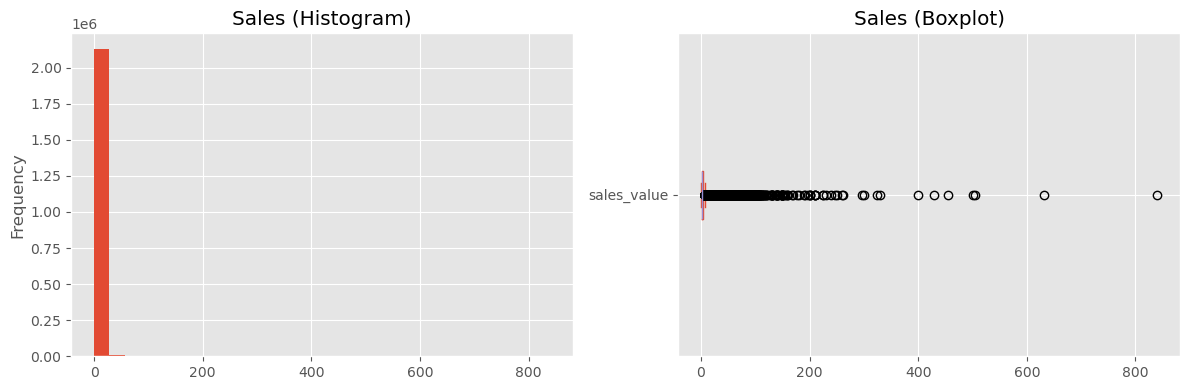

In [64]:
print(f"Total Sales: {transactions['sales_value'].sum():,}") # print total sales
print("\n")
print("Sales' Statistics")
print(transactions['sales_value'].describe()) # print sales statistics
# plot the sales_value distribution in box-plot
fig, axs = plt.subplots(1, 2, figsize=(12, 4)) 

transactions['sales_value'].plot.hist(ax=axs[0], title="Sales (Histogram)", bins=30)

transactions['sales_value'].plot.box(ax=axs[1], vert=False, title="Sales (Boxplot)")

plt.tight_layout() 
plt.show()

#### Quantity's Statistics & Distirbution
Provides an overall measure of the volume of goods sold and can indicate the scale of business operations, shows the variability and helps identify outliers or patterns in purchasing behavior.

Total Quantity: 212,233,694


Quantity's Statistics
count    2.141908e+06
mean     9.908628e+01
std      1.138132e+03
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      8.963800e+04
Name: quantity, dtype: float64


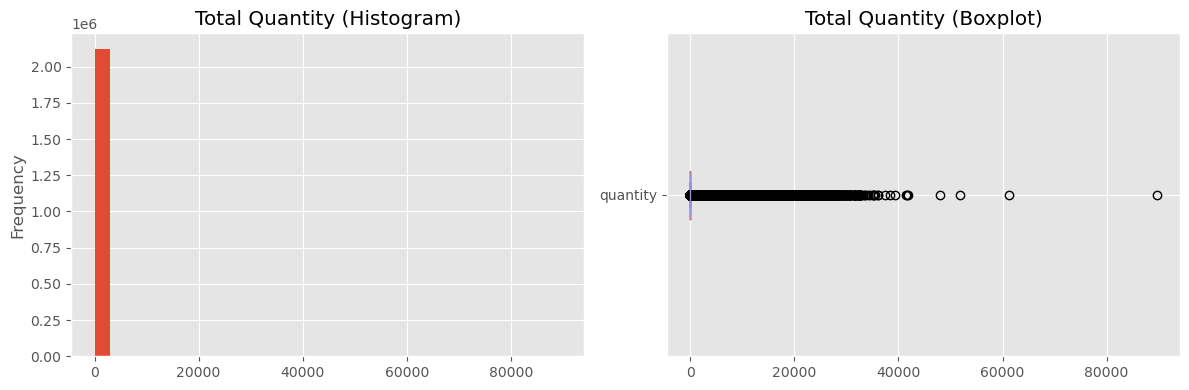

In [65]:
print(f"Total Quantity: {transactions['quantity'].sum():,}")
print("\n")
print("Quantity's Statistics")
print(transactions['quantity'].describe())

fig, axs = plt.subplots(1, 2, figsize=(12, 4)) 

transactions['quantity'].plot.hist(ax=axs[0], title="Total Quantity (Histogram)", bins=30)

transactions['quantity'].plot.box(ax=axs[1], vert=False, title="Total Quantity (Boxplot)")

plt.tight_layout() 
plt.show()


#### Discount's Statistics & Distribution
Helpful for evaluating promotional expenses and understanding typical discount sizes. It also highlights how consistent discounting is and whether there are significant deviations. The distribution identifies common discount ranges and potential outliers that might need further analysis.

Total Discount: 1,176,459.0


Discount's Statistics
count    2.141908e+06
mean     5.492576e-01
std      1.257951e+00
min      0.000000e+00
25%      0.000000e+00
50%      5.000000e-02
75%      6.900000e-01
max      1.300200e+02
Name: total_discount, dtype: float64


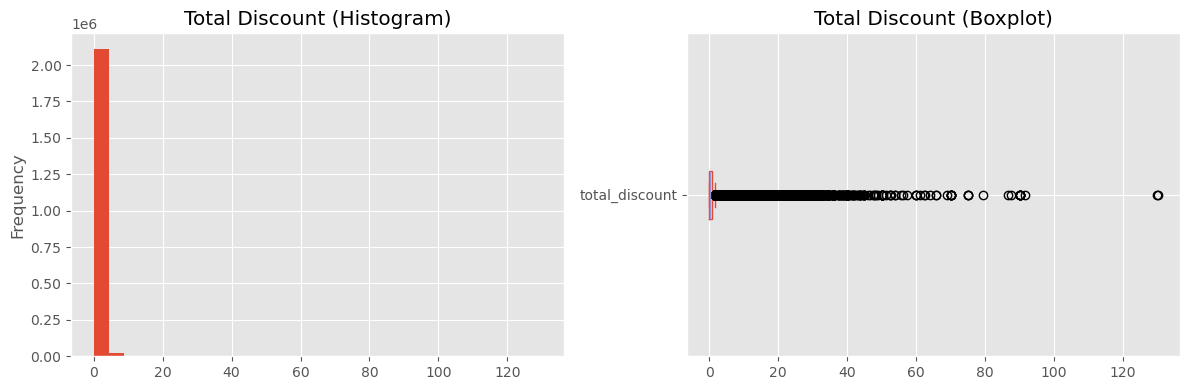

In [66]:
print(f"Total Discount: {transactions['total_discount'].sum().round():,}") # Total Discount
print("\n")
print("Discount's Statistics")
print(transactions['total_discount'].describe())

fig, axs = plt.subplots(1, 2, figsize=(12, 4)) 

transactions['total_discount'].plot.hist(ax=axs[0], title="Total Discount (Histogram)", bins=30)

transactions['total_discount'].plot.box(ax=axs[1], vert=False, title="Total Discount (Boxplot)")

plt.tight_layout() 
plt.show()

The value shows steep discount, because this is a discount retailer... so, it is not too suprising!

#### Discount Percentage Statistics & Distribution

Discount Percentage's Statistics
count    2.141908e+06
mean     2.075549e-01
std      2.911754e-01
min      0.000000e+00
25%      0.000000e+00
50%      3.370000e-02
75%      3.328000e-01
max      1.000000e+00
Name: percentage_discount, dtype: float64


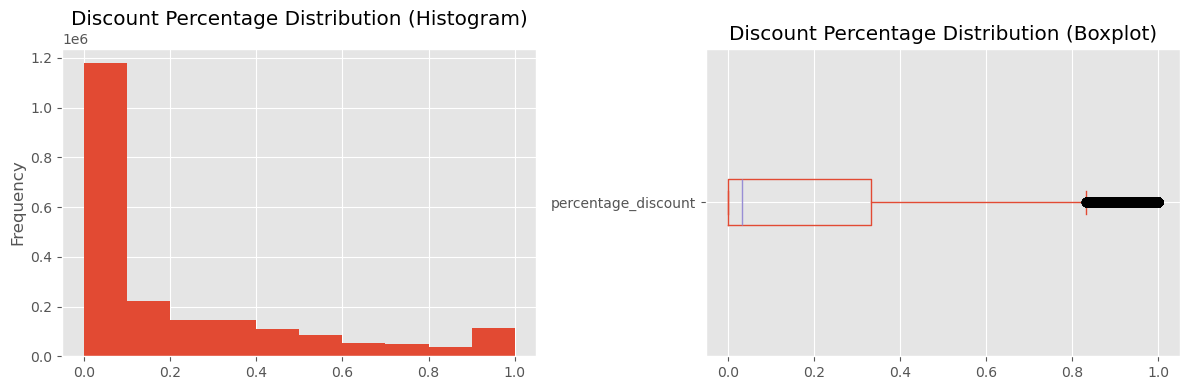

In [67]:
print("Discount Percentage's Statistics")
print(transactions['percentage_discount'].describe())

fig, axs = plt.subplots(1, 2, figsize=(12, 4)) 

transactions['percentage_discount'].plot.hist(ax=axs[0], title="Discount Percentage Distribution (Histogram)")

transactions['percentage_discount'].plot.box(ax=axs[1], vert=False, title="Discount Percentage Distribution (Boxplot)")

plt.tight_layout() 
plt.show()

Findings:

The majority of the item comes with less than 20% discount


__________________________________________
_____________________________________________
## Households/Customers Analysis
_______________________________________________
______________________________________________
### Objective:

Understand customer purchasing patterns, average spending, and response to discounts. Identify loyal customers, high spenders, and discount-sensitive segments.

#### Calculating Total and Average Spend per Household

In [68]:
household_spending = (transactions.groupby("household_key")
                      .agg(total_orders = ('basket_id','nunique'),
                           total_spend = ("sales_value","sum"),
                           total_discount = ("total_discount","sum"),
                           )
                      .reset_index()
                     )

household_spending = household_spending.assign(
                            avg_order_spend = (household_spending['total_spend']/household_spending['total_orders']).round(2),
                            avg_order_discount = (household_spending['total_discount']/household_spending['total_orders']).round(2),
                            )

household_spending = household_spending.sort_values(by='total_spend', ascending=False)

household_spending.to_csv("../results/household_spending.csv", index=False) # saved for further analysis

household_spending

,household_key,total_orders,total_spend,total_discount,avg_order_spend,avg_order_discount
1607,1609,412,27859.679688,2509.68,67.62,6.09
1451,1453,761,21661.289062,2880.00,28.46,3.78
1428,1430,344,20352.990234,2491.62,59.17,7.24
717,718,599,19299.859375,4131.39,32.22,6.90
706,707,498,19194.419922,2193.94,38.54,4.41
...,...,...,...,...,...,...
10,11,5,33.389999,10.98,6.68,2.20
521,522,3,29.340000,0.29,9.78,0.10
688,689,3,28.959999,3.84,9.65,1.28
1895,1897,1,19.580000,0.98,19.58,0.98


### Household Segmentation by Spending 

In [69]:
# Spending Segmentation
household_spending['spending_category'] = pd.qcut(household_spending['total_spend'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

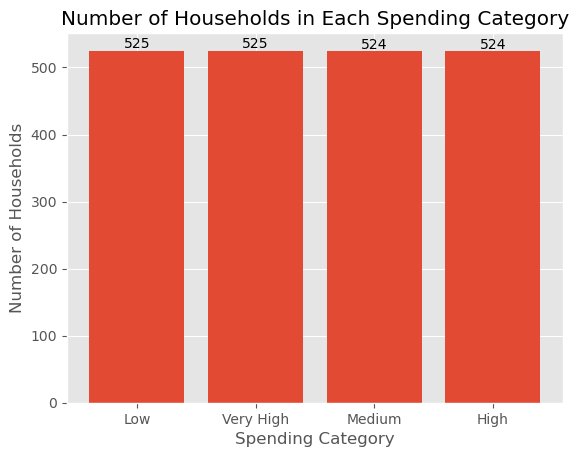

In [70]:
# count each spending_category
category_counts = household_spending['spending_category'].value_counts()

# Create a figure and axis
fig, ax = plt.subplots()

# Create a bar chart
bars = ax.bar(category_counts.index, category_counts.values)

# Set the title and labels
ax.set_title('Number of Households in Each Spending Category')
ax.set_xlabel('Spending Category')
ax.set_ylabel('Number of Households')

# Add numbers at the top of each bar
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), 
            ha='center', va='bottom')

# Show the plot
plt.show()

### Insights from the Graph:
1. **Uniform Distribution**: The number of households in each spending category (`Low`, `Very High`, `Medium`, `High`) is almost evenly distributed, with only minor differences in counts.
2. **Equal High Counts**: Both `Low` and `Very High` spending categories have the highest counts at 525 households each, suggesting that a significant portion of households either spend very little or spend a lot.
3. **Balanced Spending Categories**: The slight difference between `Medium` and `High` categories, both around 524 households, indicates a balanced distribution of spending habits.

### Recommendations for Business Decision-Making:
1. **Targeted Marketing**:
   - **Low Spending Households**: Develop marketing strategies to encourage higher spending, such as promotions or discounts on frequently purchased items.
   - **Very High Spending Households**: Introduce loyalty programs or premium services to retain these high-value customers and encourage continued spending.
   
2. **Product Offerings**:
   - **Diversify Products**: Ensure a wide range of products is available to cater to the different spending habits. For `Low` spenders, focus on value-for-money options. For `Very High` spenders, consider introducing exclusive or premium products.
   
3. **Customer Segmentation**:
   - **Personalized Engagement**: Use customer segmentation to tailor communication and offers based on spending categories. Personalized messages can improve engagement and sales.

4. **Incentivize Middle Categories**:
   - For households in `Medium` and `High` categories, consider incentives to shift them into the `Very High` category, such as bundle offers or cashback on higher spend thresholds.

5. **Retention Programs**:
   - Implement retention strategies across all categories to maintain the customer base. For `Low` spenders, focus on engagement strategies to increase brand loyalty, while for `High` and `Very High`, emphasize exclusive benefits.



___________________________

### Order Frequency Analysis

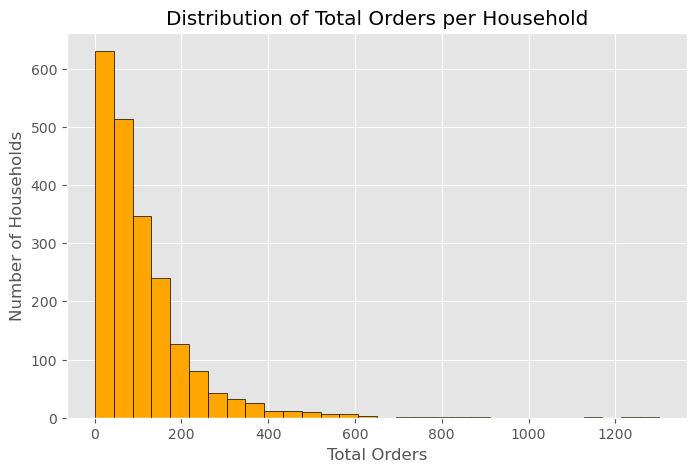

In [71]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the histogram
ax.hist(household_spending['total_orders'], bins=30, color='orange', edgecolor='black')

# Set the title and labels
ax.set_title('Distribution of Total Orders per Household')
ax.set_xlabel('Total Orders')
ax.set_ylabel('Number of Households')

# Show the plot
plt.show()


### Insights from the Graph:
1. **Right-Skewed Distribution**: The histogram shows a right-skewed distribution, indicating that most households have a relatively low number of total orders, with a small number of households placing a significantly higher number of orders.
2. **Majority with Low Orders**: A large number of households have fewer than 200 total orders, with the highest concentration around 0-50 orders.
3. **Long Tail**: There are a few households with very high total orders, extending up to over 1200 orders, suggesting a minority of highly frequent buyers.

### Recommendations for Business Decision-Making:
1. **Target Low-Order Households**:
   - **Engagement Campaigns**: Implement campaigns to encourage households with low total orders to increase their purchasing frequency. This could include personalized promotions, discounts on repeat purchases, or reminders for reordering commonly bought items.
   
2. **Retention of High-Order Households**:
   - **Loyalty Programs**: For households with high total orders, introduce or enhance loyalty programs to retain these valuable customers. Offer exclusive benefits, rewards, or personalized services to keep them engaged and loyal.
   
3. **Analyze High-Frequency Buyers**:
   - **Behavior Analysis**: Study the purchasing behavior of high-frequency buyers to identify patterns or preferences. Use these insights to develop targeted marketing strategies or product recommendations for other customers.
   
4. **Improve Order Experience**:
   - **Streamline Ordering**: Simplify the ordering process for households to encourage more frequent purchases. This could involve enhancing the user experience on digital platforms, offering one-click reordering, or optimizing delivery options.
   
5. **Segmented Marketing**:
   - **Personalized Offers**: Use the data to segment customers by order frequency and tailor marketing efforts accordingly. Low-order households could receive incentives to increase order frequency, while high-order households could be targeted with premium offers or early access to new products.



_____________________________

### Discount Utilization

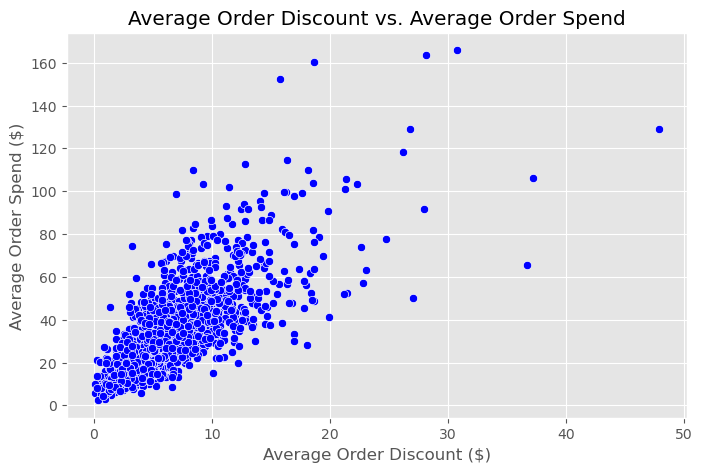

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the scatter plot using Seaborn with the ax parameter
sns.scatterplot(data=household_spending, x='avg_order_discount', y='avg_order_spend', color='blue', ax=ax)

# Set the title and labels
ax.set_title('Average Order Discount vs. Average Order Spend')
ax.set_xlabel('Average Order Discount ($)')
ax.set_ylabel('Average Order Spend ($)')

# Show the plot
plt.show()


### Insights from the Graph:
1. **Positive Correlation**: There is a general trend suggesting a positive correlation between average order discount and average order spend. As discounts increase, the average order spend tends to increase as well.
2. **Clustering at Lower Discounts**: Most of the data points are clustered at lower average discounts (0 to 10 dollars), with corresponding average order spends generally under 60 dollars.
3. **Outliers**: There are a few outliers with high average order discounts (above 20 dollars) and high average order spends, indicating that for some households, significant discounts lead to substantially higher spending.

### Recommendations for Business Decision-Making:
1. **Optimize Discount Strategies**:
   - **Moderate Discounts**: Since most households cluster at lower discount levels, consider offering moderate discounts to encourage higher spending without significantly eroding margins.
   
2. **Targeted Promotions**:
   - **High-Spend Segments**: For households that respond well to higher discounts, targeted promotions could be deployed to maximize order values. This could be done through personalized offers based on past purchasing behavior.
   
3. **Balance Discount and Spend**:
   - **Avoid Excessive Discounting**: While higher discounts may increase spending, it is essential to analyze the profitability. Avoid excessive discounting that might erode profit margins unless it leads to a substantial increase in order volume or long-term customer value.
   
4. **Behavioral Segmentation**:
   - **Segment Analysis**: Further analyze customer segments that respond differently to discounts. This can help in tailoring discounts to specific customer groups, optimizing the effectiveness of promotional strategies.
   
5. **Encourage Higher Spending with Thresholds**:
   - **Discount Thresholds**: Implement discount thresholds where customers must spend a minimum amount to receive a discount. This strategy can encourage customers to increase their order size to qualify for a discount, thereby increasing overall revenue.

By leveraging these insights, businesses can fine-tune their discount strategies to encourage higher spending while maintaining profitability.


__________________________________

#### Average Order Value (AOV) Analysis

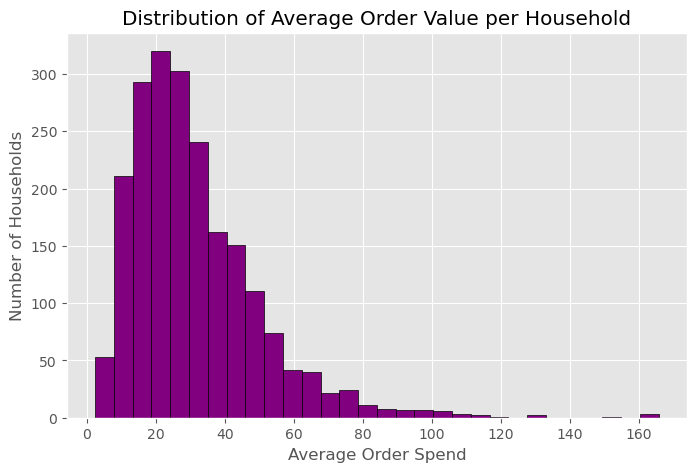

In [73]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the histogram on the axis
ax.hist(household_spending['avg_order_spend'], bins=30, color='purple', edgecolor='black')

# Set the title and labels
ax.set_title('Distribution of Average Order Value per Household')
ax.set_xlabel('Average Order Spend')
ax.set_ylabel('Number of Households')

# Show the plot
plt.show()


### Insights from the Graph:
1. **Right-Skewed Distribution**: The distribution of average order spend per household is right-skewed, with the majority of households having an average order spend between $10 and $50. This indicates that most households tend to spend within this range per order.
2. **Few High-Spend Households**: There are fewer households with a high average order spend, with some outliers spending significantly more (above $100 per order). These could represent premium or high-value customers.
3. **Concentration Around Lower Values**: A large concentration of households has an average order spend around $20 to $30, suggesting this is the common spending range.

### Recommendations for Business Decision-Making :
1. **Identify Premium Customers**:
   - **High-Spend Segment**: Focus on identifying and understanding the characteristics of households with high average order spends. These customers might be more receptive to premium products, exclusive offers, or loyalty programs.
   
2. **Upselling and Cross-Selling Opportunities**:
   - **Increase Average Order Value**: For households in the mid-range of the distribution, consider strategies like upselling or cross-selling to encourage them to increase their average order spend. This could include bundle offers, discounts on larger orders, or personalized recommendations.
   
3. **Segmented Marketing Campaigns**:
   - **Targeted Promotions**: Use the distribution data to create segmented marketing campaigns. For example, offer discounts or special deals to low-spending households to encourage higher spending, while providing exclusive benefits or premium services to high-spending households.
   
4. **Product Pricing and Assortment**:
   - **Optimize Pricing**: Consider reviewing the pricing strategy to ensure it aligns with the spending behavior of the majority of households. Offering products in the $20-$50 range might align well with the observed spending pattern.
   
5. **Customer Retention Strategies**:
   - **Retention Programs**: Develop customer retention programs targeting both mid and high spenders to maintain and potentially increase their spending levels. Loyalty programs or rewards could be effective in achieving this.

By leveraging these insights, businesses can tailor their strategies to maximize revenue, enhance customer satisfaction, and build long-term customer relationships.


________________________________________

### Household/Customer RFM Analysis

#### Objectives

1. **Identify Key Customer Segments**:
   - Categorize customers based on their Recency, Frequency, and Monetary value to understand their buying behavior.
   
2. **Enhance Customer Retention**:
   - Recognize loyal customers and develop targeted retention strategies to maintain high-value relationships.

3. **Optimize Marketing Campaigns**:
   - Tailor marketing efforts by identifying customers who are most likely to respond to specific campaigns based on their RFM score.

4. **Boost Revenue**:
   - Focus on high-value customers and develop strategies to encourage repeat purchases, thereby increasing overall sales.

5. **Improve Customer Engagement**:
   - Personalize interactions and promotions based on customer segments, ensuring more relevant and effective communication.

6. **Predict Customer Lifetime Value (CLV)**:
   - Use RFM analysis to estimate the future value of customers and allocate resources accordingly for long-term growth.

7. **Identify At-Risk Customers**:
   - Detect customers with declining engagement and implement reactivation campaigns to win them back.

8. **Measure Campaign Effectiveness**:
   - Evaluate the impact of marketing campaigns by tracking changes in customer behavior across different RFM segments.


In [74]:
# Calculate RFM metrics
rfm = transactions.groupby('household_key').agg({
    'day': 'min',  # Recency (minimum number of days since last visit)
    'basket_id': 'nunique',  # Frequency (unique transactions)
    'sales_value': 'sum'  # Monetary (total spending)
}).rename(columns={
    'day': 'recency',
    'basket_id': 'frequency',
    'sales_value': 'monetary'
}).reset_index()

# Assign RFM scores

rfm['R_score'] = pd.qcut(rfm['recency'], q=4, labels=range(4, 0, -1), duplicates='drop')
rfm['F_score'] = pd.qcut(rfm['frequency'].rank(method='first'), q=4, labels=range(1, 5))
rfm['M_score'] = pd.qcut(rfm['monetary'], q=4, labels=range(1, 5))

# Calculate RFM Segment and Score
rfm['RFM_Segment'] = rfm['R_score'].astype(str) + rfm['F_score'].astype(str) + rfm['M_score'].astype(str)
rfm['RFM_Score'] = rfm[['R_score', 'F_score', 'M_score']].sum(axis=1)

# Group by RFM Segment for further analysis
rfm_segment_analysis = rfm.groupby('RFM_Segment').agg({
    'household_key': 'count',
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': 'mean'
}).rename(columns={'household_key': 'count'}).reset_index()

rfm_segment_analysis.style.set_table_styles([{"selector":"tr:hover", "props":"background-color: orange; font-size:2em;"}])




,RFM_Segment,count,recency,frequency,monetary
0,111,267,23.198502,16.576779,384.641663
1,112,54,10.759259,29.222222,1314.710449
2,113,8,9.000000,30.375000,2516.316162
3,121,45,10.088889,48.888889,633.086670
4,122,64,10.515625,52.484375,1478.661499
5,123,30,8.066667,58.200000,2713.714111
6,124,4,8.250000,55.500000,4979.145020
7,131,2,10.000000,95.500000,757.224976
8,132,9,5.888889,100.111111,1805.703369
9,133,19,6.684211,94.894737,2800.475342


### Insights and Recommendations for Business Decision-Making

#### Insights:
1. **High-Value Segments (e.g., RFM Segment 444)**:
   - Customers in this segment show very frequent purchases, high monetary value, and the most recent interactions.
   - These are your most valuable customers who contribute significantly to revenue.

2. **Potential Loyalists (e.g., RFM Segments 422, 432, 433)**:
   - Customers in these segments exhibit high frequency and monetary value with relatively recent transactions.
   - They are on the path to becoming highly loyal customers.

3. **Churn Risk Customers (e.g., RFM Segment 111)**:
   - These customers have low recency, frequency, and monetary scores, indicating they have not engaged recently and contribute less to revenue.
   - They are at risk of churn.

4. **Recent but Low-Spending Customers (e.g., RFM Segment 411)**:
   - These customers are recent but with low frequency and monetary scores.
   - They may require strategies to increase spending and engagement.

5. **High Spenders with Low Frequency (e.g., RFM Segment 341)**:
   - This group has made high-value transactions but with infrequent visits.
   - They have potential for increased engagement.

#### Recommendations:
1. **Retention Strategies for High-Value Segments**:
   - Offer exclusive rewards, loyalty programs, and personalized promotions to retain and increase engagement with top customers.

2. **Nurture Potential Loyalists**:
   - Focus on maintaining and increasing frequency of purchases through targeted marketing, special offers, and personalized recommendations.

3. **Reactivate At-Risk Customers**:
   - Implement reactivation campaigns, such as sending re-engagement emails, discounts, or special offers to bring back churn-risk customers.

4. **Upsell and Cross-Sell to Recent Low-Spending Customers**:
   - Encourage additional purchases through targeted cross-selling and upselling strategies, possibly using product recommendations.

5. **Increase Engagement of High Spenders with Low Frequency**:
   - Use incentives, such as limited-time offers or loyalty points, to encourage these customers to shop more frequently.

6. **Customer Experience Enhancement**:
   - Conduct surveys or feedback sessions to understand the needs of different customer segments, ensuring a better shopping experience.

7. **Tailored Marketing Campaigns**:
   - Use the RFM segments to create more effective, segmented marketing campaigns that cater to the specific behaviors and needs of each customer group.

8. **Monitor and Adjust Strategies**:
   - Continuously monitor the performance of each RFM segment and adjust marketing strategies based on customer behavior and engagement.


______________________________________________________

### Top Households by Spending

In [75]:


# Create IntRangeSlider for selecting the range of week_no
week_range = widgets.IntRangeSlider(
    value = (transactions['week_no'].min(),transactions['week_no'].max()),
    min=transactions['week_no'].min(), 
    max=transactions['week_no'].max(), 
    description='Weeks Range'
)

# Function to filter and display top 20 households by sales_value
def filter_and_display_top_households(week_range):
    start_week, end_week = week_range

    # Filter transactions based on the selected week range
    top_20_households = (transactions[transactions['week_no'].between(start_week, end_week)]
                         .groupby('household_key')['sales_value']
                         .sum()
                         .reset_index()
                         .sort_values('sales_value', ascending=False)
                         .head(20)
    )

    # Plot the bar chart
    fig, ax = plt.subplots(figsize=(14, 4))
    top_20_households.plot.bar(
        x='household_key', y='sales_value', 
        rot=45, xlabel="Household Key", ylabel="Spending", 
        title="Top 20 Households by Spending", 
        legend=False, ax=ax
    )
    plt.show()

    

# Create and display the interactive widget with layout
interactive_plot = widgets.interactive(filter_and_display_top_households, week_range=week_range)

# Arrange the widget and the output side by side
ui = widgets.HBox([interactive_plot.children[1], interactive_plot.children[0]])
display(ui)


### Insights from the Output:

1. **Top Spenders:**  
   The bar chart highlights the top 20 households based on total spending. The household with `household_key 1609` has the highest total spend, significantly more than the other households.

2. **Spending Distribution:**  
   The spending drops moderately from the top spender, but the remaining households have relatively close total spending, suggesting a fairly even distribution among the top spenders after the first.

3. **Potential High-Value Customers:**  
   The top few households contribute significantly to total revenue, indicating they might be high-value customers. These customers could be prioritized for loyalty programs or personalized marketing strategies.

4. **Identifying Trends:**  
   The consistent spending levels among the remaining households suggest there could be a common characteristic or behavior among them, worth investigating.

### Recommendations for Business Decision-Making:

1. **Loyalty and Rewards Programs:**  
   - Implement targeted loyalty programs for the top spenders to encourage continued or increased spending.
   - Offer exclusive rewards or discounts to retain these high-value customers.

2. **Personalized Marketing:**  
   - Develop personalized marketing campaigns for the top spenders, based on their spending habits and preferences.
   - Use data from their purchase history to suggest products or services that align with their interests.

3. **Customer Retention Strategies:**  
   - Focus on retaining the top 20 households by offering personalized customer service or premium support.
   - Consider creating a VIP customer tier with added benefits to make these households feel valued.

4. **Analysis of Middle-Tier Spenders:**  
   - Conduct a deeper analysis of households with similar spending levels to identify patterns or behaviors that could be encouraged across other customer segments.
   - Explore what drives their spending and apply those insights to increase spending among other customer groups.

5. **Upselling and Cross-Selling Opportunities:**  
   - Look for upselling and cross-selling opportunities within this group, potentially introducing new products or services that align with their spending habits.

6. **Data-Driven Decision-Making:**  
   - Continuously monitor and analyze spending patterns to adjust marketing strategies, promotional offers, and product recommendations.

By leveraging these insights and recommendations, the business can enhance customer relationships, boost spending, and optimize revenue from its top households.


__________________________________

### Spending by Age Group

Objective: Understand how different age groups fall into various spending categories.


In [76]:
households_demographics_spending = pd.merge(household_spending, demographics, on='household_key', how='inner')

households_demographics_spending.head()

,household_key,total_orders,total_spend,total_discount,avg_order_spend,avg_order_discount,spending_category,age_desc,marital_status_code,income_desc,homeowner_desc,hh_comp_desc,household_size_desc,kid_category_desc
0,1609,412,27859.679688,2509.68,67.62,6.09,Very High,45-54,A,125-149K,Homeowner,2 Adults Kids,5+,3+
1,1453,761,21661.289062,2880.00,28.46,3.78,Very High,45-54,A,125-149K,Homeowner,2 Adults Kids,3,1
2,1430,344,20352.990234,2491.62,59.17,7.24,Very High,35-44,A,35-49K,Homeowner,2 Adults Kids,3,1
3,718,599,19299.859375,4131.39,32.22,6.90,Very High,45-54,A,25-34K,Homeowner,2 Adults Kids,5+,3+
4,707,498,19194.419922,2193.94,38.54,4.41,Very High,25-34,A,100-124K,Homeowner,2 Adults Kids,5+,3+


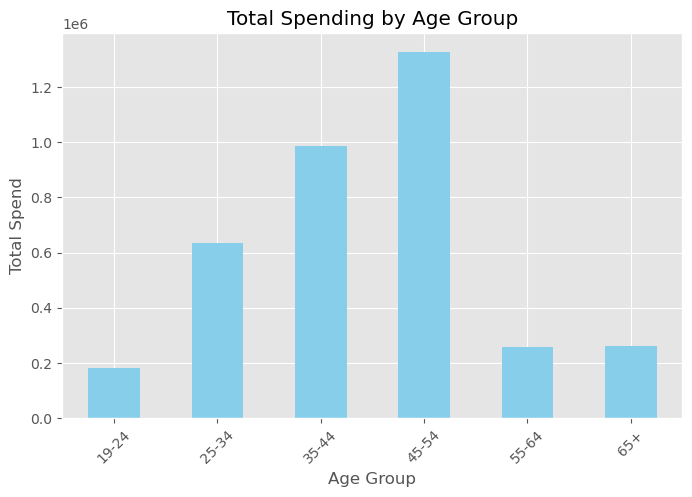

In [77]:

# Group by age and sum total spending
age_spending = households_demographics_spending.groupby('age_desc')['total_spend'].sum().sort_index()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the data
age_spending.plot(kind='bar', color='skyblue', ax=ax)

# Set the title and labels
ax.set_title('Total Spending by Age Group')
ax.set_xlabel('Age Group')
ax.set_ylabel('Total Spend')

# Rotate x-axis labels
ax.set_xticklabels(age_spending.index, rotation=45)

# Display the plot

plt.show()

# Insight
# This analysis reveals which age groups are the highest spenders. 
# It can guide age-specific marketing strategies or product recommendations.


### Insights from the Graph

#### Total Spending by Age Group

1. **High Spending Age Groups**:
   - The age group **45-54** shows the highest total spending, significantly higher than other age groups.
   - The **35-44** age group follows as the second highest spender.

2. **Moderate Spending Age Groups**:
   - The **25-34** age group shows moderate spending, being the third highest.

3. **Low Spending Age Groups**:
   - Age groups **19-24**, **55-64**, and **65+** exhibit relatively lower total spending compared to the younger and middle-aged groups.

### Business Recommendations

1. **Targeted Marketing for High Spending Age Groups**:
   - Focus marketing and promotional efforts on the **45-54** and **35-44** age groups as they contribute the most to total spending.
   - Create age-specific campaigns or loyalty programs to further engage these segments.

2. **Engagement Strategies for Moderate Spenders**:
   - Develop strategies to increase spending within the **25-34** age group, such as personalized offers, discounts, or products tailored to their lifestyle needs.

3. **Growth Opportunities in Lower Spending Segments**:
   - Explore opportunities to increase engagement and spending among the **19-24**, **55-64**, and **65+** age groups. This could include:
     - Offering budget-friendly products or services for the younger and senior demographics.
     - Implementing educational campaigns to raise awareness of the brand's offerings for these groups.

4. **Product and Service Diversification**:
   - Consider diversifying product or service offerings to cater to the preferences of different age groups, particularly focusing on the needs of the lower spending segments.

By focusing on these insights and recommendations, the business can better allocate resources and tailor its strategies to maximize revenue across different age groups.


____________________________________

### Spending by Income Group
Objective: Examine the income levels associated with different spending categories

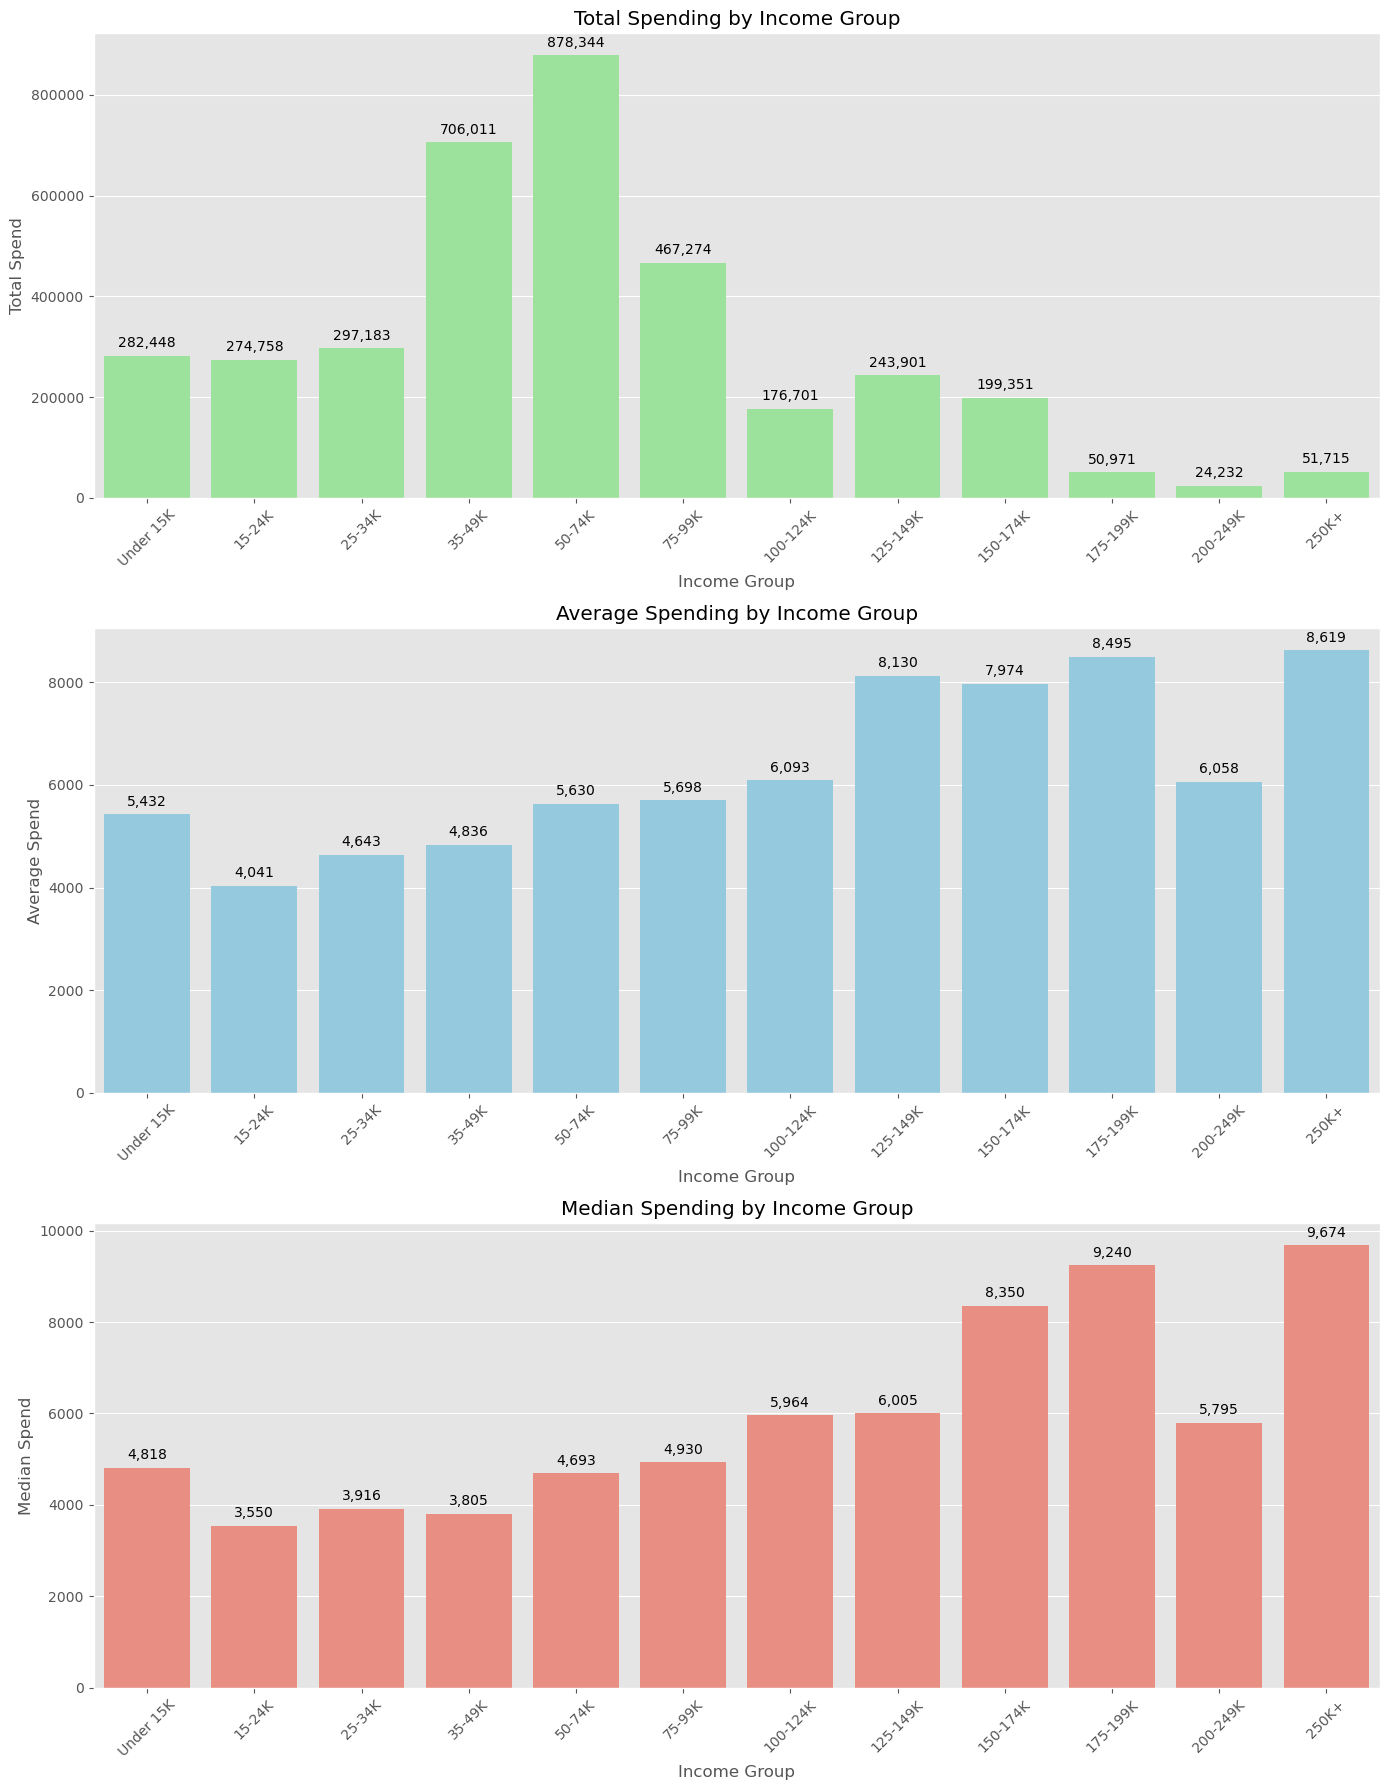

In [78]:
# Spending by Income Group and add new column for income group order
income_spending = households_demographics_spending.groupby('income_desc', as_index=False).agg(total_spend=("total_spend","sum"),
                                                                                                 median_spend=("total_spend","median"),
                                                                                                 average_spend=("total_spend","mean"))
income_spending["income_desc_order"] = income_spending['income_desc'].str.split('-').str[1]
income_spending.loc[income_spending['income_desc'] == '250K+', 'income_desc_order'] = '250K'
income_spending.loc[income_spending['income_desc'] == 'Under 15K', 'income_desc_order'] ="15K"
income_spending["income_desc_order"] = income_spending["income_desc_order"].str.replace("K","").astype("int32")
income_spending = income_spending.sort_values("income_desc_order")
income_spending

# Create a figure with 3 rows and 1 column
fig, axs = plt.subplots(3, 1, figsize=(14, 18))

# First graph: Total Spending by Income Group
sns.barplot(x='income_desc', y='total_spend', data=income_spending, ax=axs[0], color='lightgreen')
axs[0].set_title('Total Spending by Income Group')
axs[0].set_xlabel('Income Group')
axs[0].set_ylabel('Total Spend')
axs[0].tick_params(axis='x', rotation=45)

# Display the values on top of the bars
for p in axs[0].patches:
    axs[0].annotate(f'{p.get_height():,.0f}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 9),  # 9 points vertical offset
                    textcoords='offset points')

# Second graph: Average Spending by Income Group
sns.barplot(x='income_desc', y='average_spend', data=income_spending, ax=axs[1], color='skyblue')
axs[1].set_title('Average Spending by Income Group')
axs[1].set_xlabel('Income Group')
axs[1].set_ylabel('Average Spend')
axs[1].tick_params(axis='x', rotation=45)

# Display the values on top of the bars
for p in axs[1].patches:
    axs[1].annotate(f'{p.get_height():,.0f}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 9),  # 9 points vertical offset
                    textcoords='offset points')

# Third graph: Median Spending by Income Group
sns.barplot(x='income_desc', y='median_spend', data=income_spending, ax=axs[2], color='salmon')
axs[2].set_title('Median Spending by Income Group')
axs[2].set_xlabel('Income Group')
axs[2].set_ylabel('Median Spend')
axs[2].tick_params(axis='x', rotation=45)

# Display the values on top of the bars
for p in axs[2].patches:
    axs[2].annotate(f'{p.get_height():,.0f}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 9),  # 9 points vertical offset
                    textcoords='offset points')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Display the plot
plt.show()


### Insights

1. **Total Spending by Income Group**:
   - The **$50-74K** income group shows the highest total spending, followed by **$35-49K** and **$75-99K**.
   - Lower spending is observed in income groups **under $35K** and **above $150K**, especially in **$175-199K** and **$200-249K** brackets.

2. **Average Spending by Income Group**:
   - The **$150-174K** and **$175-199K** income groups have the highest average spending per household, despite lower total spending.
   - Lower-income groups (**Under $25K**) show the lowest average spending, indicating limited discretionary spending.

3. **Median Spending by Income Group**:
   - The median spending is highest in the **$150-174K** and **$175-199K** income groups, indicating that the central tendency of spending is skewed higher for these groups.
   - The median spending for lower-income groups is consistently below $5,000, indicating tighter budget constraints.

### Recommendations for Business Decision Making

1. **Target High-Spending Groups**:
   - Focus marketing and engagement strategies on the **$50-74K**, **$35-49K**, and **$75-99K** groups to maximize overall revenue due to their high total spending.
   
2. **Premium Product Offerings**:
   - Introduce premium or exclusive product lines targeting the **$150-174K** and **$175-199K** income groups, leveraging their high average and median spending capabilities.

3. **Tailored Promotions for Lower-Income Groups**:
   - Offer discounts, value bundles, or loyalty programs targeting **under $25K** income groups to boost their spending while accommodating their budget constraints.

4. **Segmentation and Personalization**:
   - Use the spending behavior insights to refine customer segmentation, delivering personalized marketing messages and promotions to each income group based on their spending patterns.

5. **Focus on Discretionary Spending**:
   - For higher-income groups (**$150K+**), explore opportunities in discretionary spending categories, as these groups show a higher willingness to spend on average despite lower total spending.

6. **Data-Driven Campaigns**:
   - Develop data-driven marketing campaigns that highlight different spending capacities and preferences across income groups, ensuring better alignment with customer needs and expectations.


____________________________________

### Spending by Homeownership
Objective: Highlight differences in spending behavior between homeowners and renters.

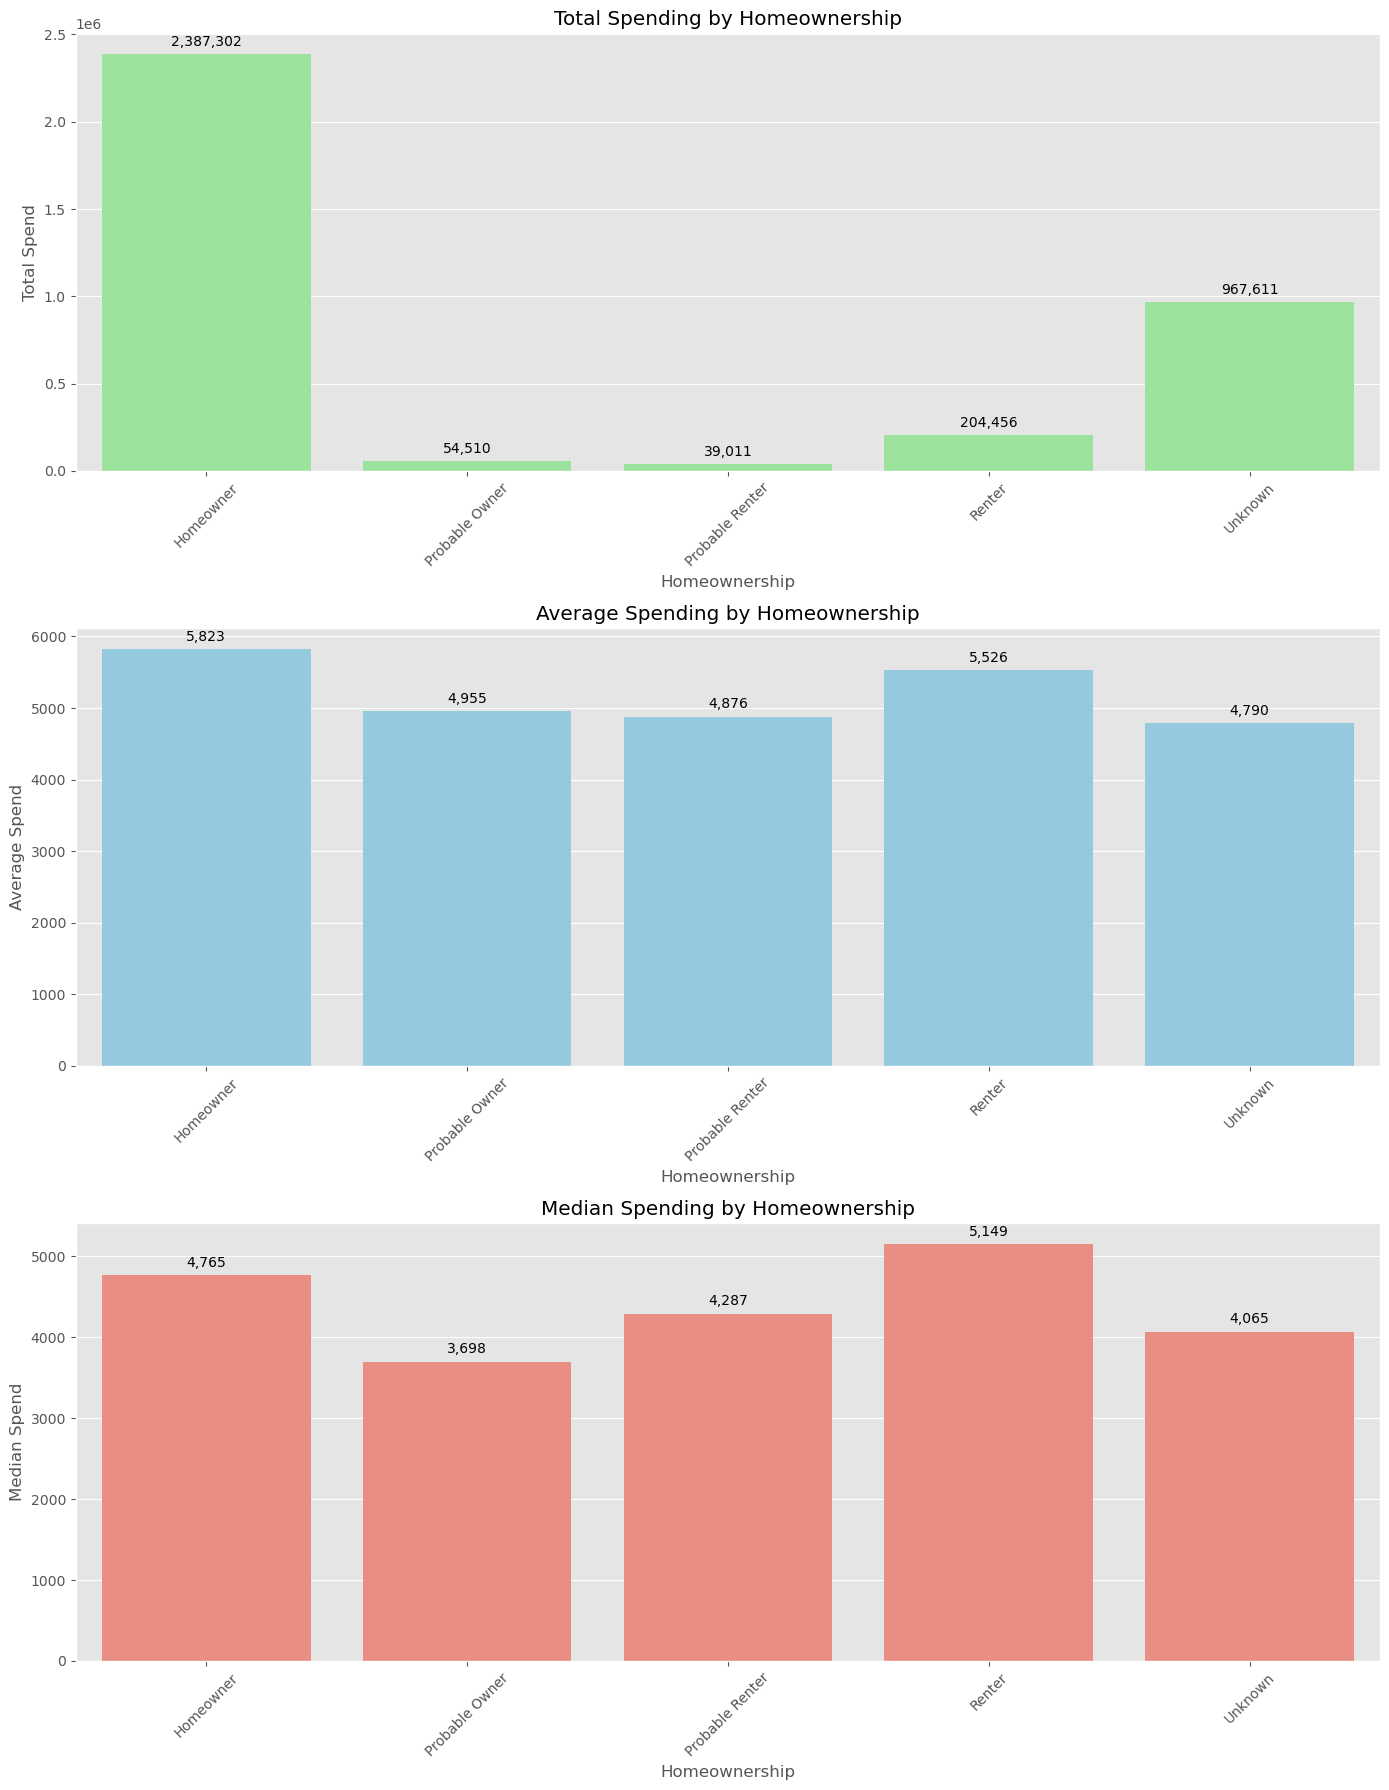

In [79]:

# Group data and aggregate by homeownership
homeowner_spending = households_demographics_spending.groupby('homeowner_desc', as_index=False).agg(total_spend=("total_spend","sum"),
                                                                                                 median_spend=("total_spend","median"),
                                                                                                 average_spend=("total_spend","mean"))

# Create a figure with 3 rows and 1 column
fig, axs = plt.subplots(3, 1, figsize=(14, 18))

# First graph: Total Spending by Homeownership
sns.barplot(x='homeowner_desc', y='total_spend', data=homeowner_spending, ax=axs[0], color='lightgreen')
axs[0].set_title('Total Spending by Homeownership')
axs[0].set_xlabel('Homeownership')
axs[0].set_ylabel('Total Spend')
axs[0].tick_params(axis='x', rotation=45)

# Display the values on top of the bars
for p in axs[0].patches:
    axs[0].annotate(f'{p.get_height():,.0f}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 9),  # 9 points vertical offset
                    textcoords='offset points')

# Second graph: Average Spending by Homeownership
sns.barplot(x='homeowner_desc', y='average_spend', data=homeowner_spending, ax=axs[1], color='skyblue')
axs[1].set_title('Average Spending by Homeownership')
axs[1].set_xlabel('Homeownership')
axs[1].set_ylabel('Average Spend')
axs[1].tick_params(axis='x', rotation=45)

# Display the values on top of the bars
for p in axs[1].patches:
    axs[1].annotate(f'{p.get_height():,.0f}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 9),  # 9 points vertical offset
                    textcoords='offset points')

# Third graph: Median Spending by Homeownership
sns.barplot(x='homeowner_desc', y='median_spend', data=homeowner_spending, ax=axs[2], color='salmon')
axs[2].set_title('Median Spending by Homeownership')
axs[2].set_xlabel('Homeownership')
axs[2].set_ylabel('Median Spend')
axs[2].tick_params(axis='x', rotation=45)

# Display the values on top of the bars
for p in axs[2].patches:
    axs[2].annotate(f'{p.get_height():,.0f}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 9),  # 9 points vertical offset
                    textcoords='offset points')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Display the plot
plt.show()



### Insights

1. **Total Spending by Homeownership**:
   - **Homeowners** exhibit the highest total spending, followed by those with an **Unknown** homeownership status.
   - Spending is significantly lower among **Probable Owners**, **Probable Renters**, and **Renters**, with **Probable Owners** and **Probable Renters** showing the least spending.

2. **Average Spending by Homeownership**:
   - The **Homeowners** and **Renters** categories show the highest average spending per household, indicating higher individual spending capability.
   - **Probable Owners**, **Probable Renters**, and **Unknown** categories have lower average spending.

3. **Median Spending by Homeownership**:
   - **Renters** show the highest median spending, suggesting a significant portion of this group spends more consistently.
   - **Homeowners** have the second-highest median spending, while **Probable Owners**, **Probable Renters**, and **Unknown** categories trail behind.

### Recommendations for Business Decision Making

1. **Focus on Homeowners**:
   - Develop targeted marketing and product offerings for **Homeowners**, as they have the highest total and average spending, representing a key revenue-driving group.

2. **Engagement Strategies for Renters**:
   - Tailor engagement strategies for **Renters**, leveraging their high median spending. Consider offering tailored promotions or flexible payment options to further enhance spending.

3. **Investigate 'Unknown' Category**:
   - Further analysis is needed for the **Unknown** category to better understand this group's characteristics and tailor marketing strategies accordingly.

4. **Promote Affordable Options for Probable Renters/Owners**:
   - Introduce affordable product lines or financial incentives for **Probable Owners** and **Probable Renters**, encouraging increased spending in these lower-spending groups.

5. **Personalized Communication**:
   - Use these insights to segment communication strategies, providing personalized messages and promotions based on homeownership status to optimize engagement and spending across different customer groups.


____________________________________________________

### Discount Utilization by Kid Category
Objective: Show which family segments are most responsive to discounts, helping in crafting effective discount strategies.

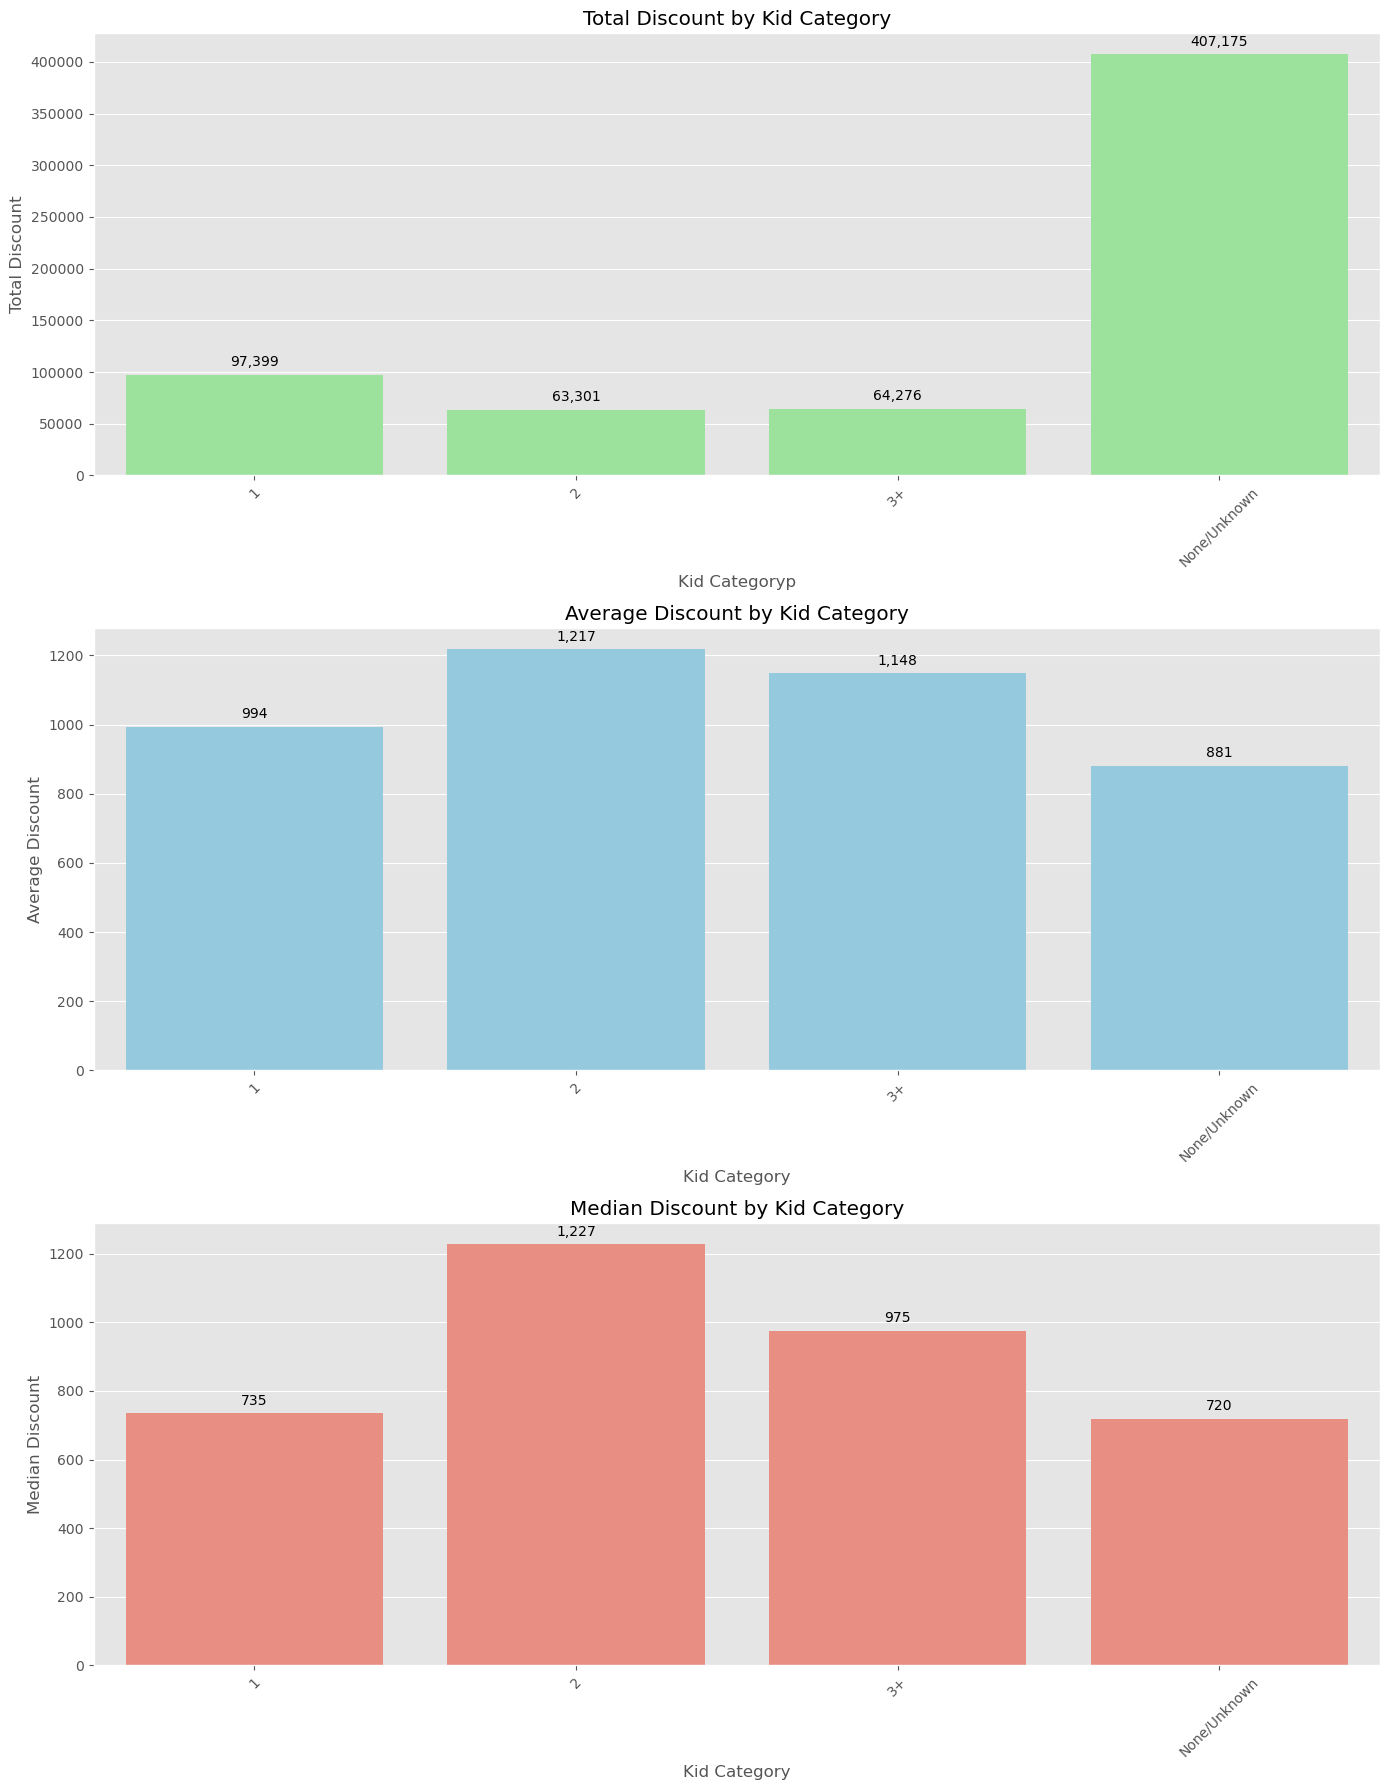

In [80]:

# Group data and aggregate by Kid Category
kid_category_discount = households_demographics_spending.groupby('kid_category_desc', as_index=False).agg(total_discount=("total_discount","sum"),
                                                                                                 median_discount=("total_discount","median"),
                                                                                                 average_discount=("total_discount","mean"))

# Create a figure with 3 rows and 1 column
fig, axs = plt.subplots(3, 1, figsize=(14, 18))

# First graph: Total Spending by Kid Category
sns.barplot(x='kid_category_desc', y='total_discount', data=kid_category_discount, ax=axs[0], color='lightgreen')
axs[0].set_title('Total Discount by Kid Category')
axs[0].set_xlabel('Kid Categoryp')
axs[0].set_ylabel('Total Discount')
axs[0].tick_params(axis='x', rotation=45)

# Display the values on top of the bars
for p in axs[0].patches:
    axs[0].annotate(f'{p.get_height():,.0f}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 9),  # 9 points vertical offset
                    textcoords='offset points')

# Second graph: Average Spending by Kid Category
sns.barplot(x='kid_category_desc', y='average_discount', data=kid_category_discount, ax=axs[1], color='skyblue')
axs[1].set_title('Average Discount by Kid Category')
axs[1].set_xlabel('Kid Category')
axs[1].set_ylabel('Average Discount')
axs[1].tick_params(axis='x', rotation=45)

# Display the values on top of the bars
for p in axs[1].patches:
    axs[1].annotate(f'{p.get_height():,.0f}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 9),  # 9 points vertical offset
                    textcoords='offset points')

# Third graph: Median Spending by Kid Category
sns.barplot(x='kid_category_desc', y='median_discount', data=kid_category_discount, ax=axs[2], color='salmon')
axs[2].set_title('Median Discount by Kid Category')
axs[2].set_xlabel('Kid Category')
axs[2].set_ylabel('Median Discount')
axs[2].tick_params(axis='x', rotation=45)

# Display the values on top of the bars
for p in axs[2].patches:
    axs[2].annotate(f'{p.get_height():,.0f}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 9),  # 9 points vertical offset
                    textcoords='offset points')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Display the plot
plt.show()





### Insights

1. **Total Discount by Kid Category**:
   - The **"Unknown"** category shows the highest total discount, significantly more than other categories, with a value of 407,175.
   - Households with **"2" kids** also received substantial total discounts compared to **"1"** and **"3+"** kid categories, which are relatively similar in total discount.

2. **Average Discount by Kid Category**:
   - Households with **"2" kids** received the highest average discount (1,217), followed by those with **"3+" kids** (1,148) and **"1" kid** (994).
   - The **"Unknown"** category received the lowest average discount (881), despite having the highest total discount.

3. **Median Discount by Kid Category**:
   - The median discount is highest for the **"2" kids** category (1,227), indicating that most households with 2 kids receive a consistent discount amount.
   - The **"3+" kids** category has a relatively high median discount (975), whereas the **"1" kid** category has a lower median discount (735).
   - The **"Unknown"** category has a median discount of 720, which is lower than the other categories despite its high total discount.

### Recommendations

1. **Targeted Promotions**:
   - Focus on households with **"2" kids** as they show the highest average and median discounts, indicating responsiveness to discounts. Consider offering tailored promotions to this group to enhance customer loyalty and spending.

2. **Explore "Unknown" Category**:
   - Investigate the **"Unknown"** category further to understand why it has the highest total discount but lower average and median discounts. This could be due to a small number of households receiving very high discounts or data inaccuracies.

3. **Balanced Discount Strategies**:
   - For households with **"1" and "3+" kids**, consider balancing the discount strategy to ensure these groups are not neglected. Offering consistent and competitive discounts can help in retaining these customer segments.

4. **Data Quality Improvement**:
   - Ensure the accuracy of the **"Unknown"** category data to provide more precise insights. This can help in making better-informed business decisions and targeting the right customer segments effectively.


__________________________________

In [81]:
households_demographics_spending

,household_key,total_orders,total_spend,total_discount,avg_order_spend,avg_order_discount,spending_category,age_desc,marital_status_code,income_desc,homeowner_desc,hh_comp_desc,household_size_desc,kid_category_desc
0,1609,412,27859.679688,2509.68,67.62,6.09,Very High,45-54,A,125-149K,Homeowner,2 Adults Kids,5+,3+
1,1453,761,21661.289062,2880.00,28.46,3.78,Very High,45-54,A,125-149K,Homeowner,2 Adults Kids,3,1
2,1430,344,20352.990234,2491.62,59.17,7.24,Very High,35-44,A,35-49K,Homeowner,2 Adults Kids,3,1
3,718,599,19299.859375,4131.39,32.22,6.90,Very High,45-54,A,25-34K,Homeowner,2 Adults Kids,5+,3+
4,707,498,19194.419922,2193.94,38.54,4.41,Very High,25-34,A,100-124K,Homeowner,2 Adults Kids,5+,3+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663,1429,83,818.559998,383.06,9.86,4.62,Low,45-54,B,35-49K,Renter,Single Female,1,None/Unknown
664,1604,156,818.410034,95.18,5.25,0.61,Low,35-44,U,35-49K,Probable Owner,2 Adults No Kids,2,None/Unknown
665,460,113,760.450012,148.45,6.73,1.31,Low,65+,B,25-34K,Homeowner,Single Female,1,None/Unknown
666,1135,64,748.880005,201.11,11.70,3.14,Low,45-54,U,50-74K,Unknown,Unknown,2,1


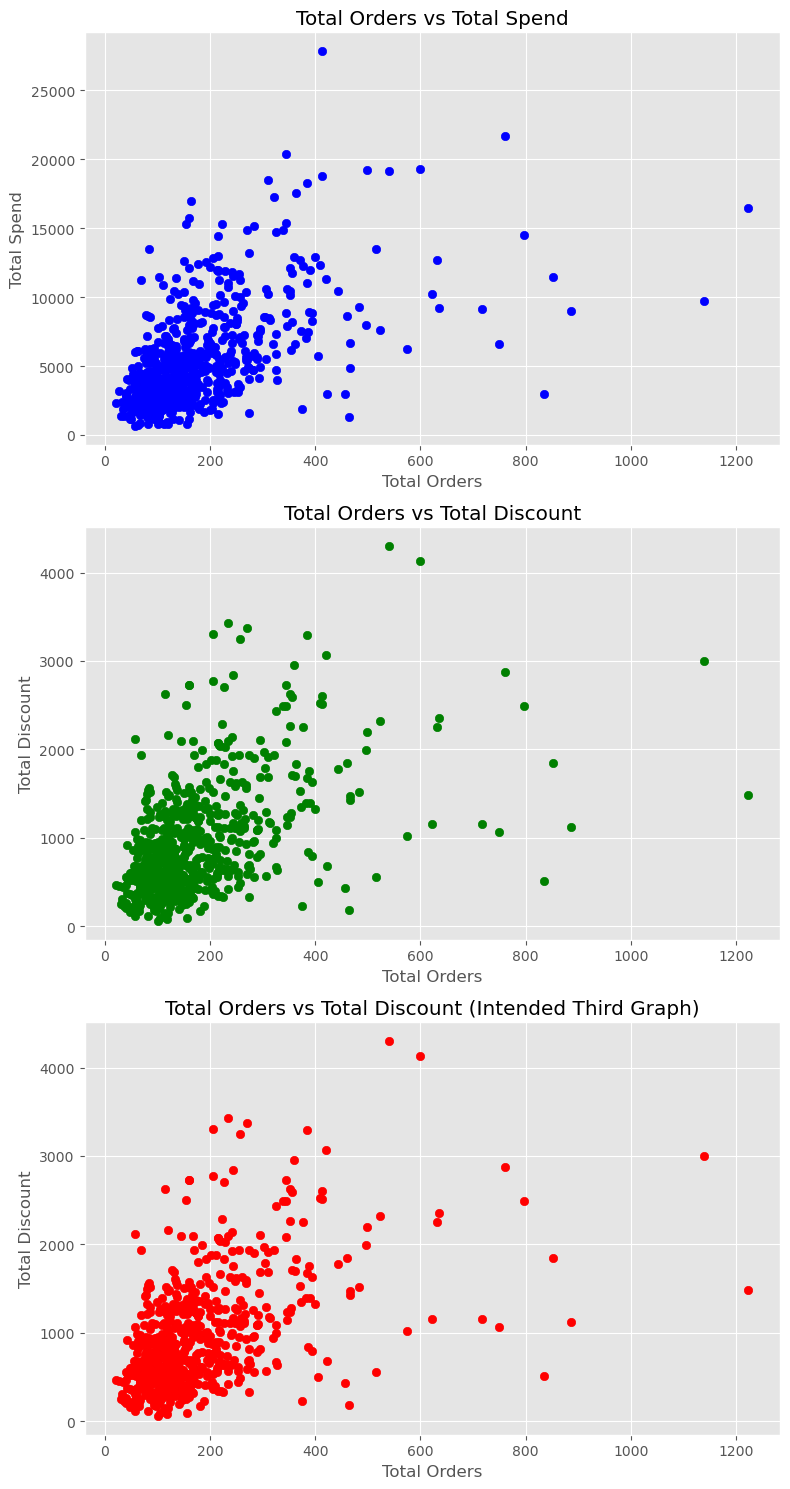

In [82]:
# Create figure and subplots 
fig, axs = plt.subplots(3, 1, figsize=(8, 15)) 

# Plot 1: total_orders vs total_spend 
axs[0].scatter(households_demographics_spending['total_orders'], households_demographics_spending['total_spend'], color='blue') 
axs[0].set_title('Total Orders vs Total Spend') 
axs[0].set_xlabel('Total Orders') 
axs[0].set_ylabel('Total Spend')

# Plot 2: total_orders vs total_discount 
axs[1].scatter(households_demographics_spending['total_orders'], households_demographics_spending['total_discount'], color='green') 
axs[1].set_title('Total Orders vs Total Discount') 
axs[1].set_xlabel('Total Orders') 
axs[1].set_ylabel('Total Discount')

# Plot 3: total_orders vs total_discount (intended third graph) 
axs[2].scatter(households_demographics_spending['total_orders'], households_demographics_spending['total_discount'], color='red') 
axs[2].set_title('Total Orders vs Total Discount (Intended Third Graph)') 
axs[2].set_xlabel('Total Orders') 
axs[2].set_ylabel('Total Discount')


# Adjust layout 
plt.tight_layout() 
# Show the plots 
plt.show()



### Insights and Recommendations from the Plots

#### Plot 1: Total Orders vs Total Spend (Blue)
- **Insight**: The scatter plot reveals a positive correlation between the total number of orders and total spend. Households that place more orders tend to have higher total spending.
- **Recommendation**: Focus marketing efforts on households with a higher frequency of orders, as they are likely to contribute significantly to overall revenue. Implement loyalty programs or targeted promotions to encourage these high-order households to maintain or increase their purchasing frequency.

#### Plot 2: Total Orders vs Total Discount (Green)
- **Insight**: There is a moderate positive correlation between total orders and total discount received. This suggests that households placing more orders tend to receive higher total discounts, possibly due to promotional strategies or bulk purchasing incentives.
- **Recommendation**: Evaluate the effectiveness of current discount strategies. Ensure that discounts are driving increased order volumes and not just reducing revenue. Consider personalized discount offers for frequent shoppers to enhance customer loyalty and maximize profitability.

#### Plot 3: Total Orders vs Total Discount (Red)
- **Insight**: This plot replicates the second plot, confirming a similar positive correlation between total orders and total discounts. The repeated graph reinforces the pattern observed in the second plot.
- **Recommendation**: While the insight aligns with the previous plot, it emphasizes the importance of reviewing visualization outputs for uniqueness to avoid redundancy. Future analysis could include other variables such as average order spend or customer demographics to gain additional insights.

### General Recommendations
1. **Customer Segmentation**: Segment customers based on order frequency, total spend, and discount sensitivity. Tailor marketing strategies for each segment to maximize engagement and ROI.
2. **Promotional Effectiveness**: Continuously monitor and optimize discount strategies to ensure they drive desired customer behaviors without eroding profit margins.
3. **Data-driven Decisions**: Use these insights to develop more targeted marketing campaigns, focusing on high-value customers and optimizing discount allocations to encourage more frequent and higher-value purchases.


In [83]:
from mpl_toolkits.mplot3d import Axes3D

C:\Users\Walee\AppData\Local\Temp\ipykernel_3452\1728541225.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  sc = ax.scatter(households_demographics_spending['total_spend'],


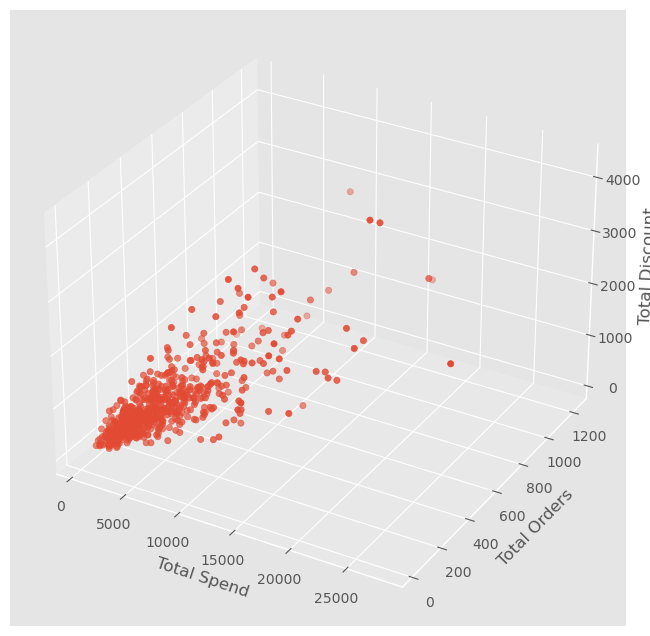

In [85]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(8, 8))
ax = Axes3D(fig)
ax = fig.add_subplot(111, projection='3d')

# Plot the data
sc = ax.scatter(households_demographics_spending['total_spend'], 
                households_demographics_spending['total_orders'], 
                households_demographics_spending['total_discount'], 
                cmap='viridis')

# Set labels
ax.set_xlabel('Total Spend')
ax.set_ylabel('Total Orders')
ax.set_zlabel('Total Discount')

# Display the plot
plt.show()

In [131]:
import plotly.express as px

# pltting the 3 columns in a 3D scatter plot
fig = px.scatter_3d(households_demographics_spending, 
                    x='total_spend', 
                    y='total_orders', 
                    z='total_discount',
                    color='total_spend', 
                    color_continuous_scale='Viridis')  # Color scale

# Set axis labels
fig.update_layout(
    scene=dict(
        xaxis_title='Total Spend',
        yaxis_title='Total Orders',
        zaxis_title='Total Discount'
    )
)

# Show the interactive plot
fig.show()


#### Taking subset of the data

In [127]:

seg_cols = ["total_spend","total_orders","total_discount"]

model_df_subset = households_demographics_spending[seg_cols]
model_df_subset


,total_spend,total_orders,total_discount
0,27859.679688,412,2509.68
1,21661.289062,761,2880.00
2,20352.990234,344,2491.62
3,19299.859375,599,4131.39
4,19194.419922,498,2193.94
...,...,...,...
663,818.559998,83,383.06
664,818.410034,156,95.18
665,760.450012,113,148.45
666,748.880005,64,201.11


#### Scaling the data

In [125]:
#
from sklearn.preprocessing import MinMaxScaler

mm_scaler = MinMaxScaler()

normalized = mm_scaler.fit_transform(model_df_subset)

model_df_subset_scaled = pd.DataFrame(normalized, columns=model_df_subset.columns)

model_df_subset_scaled

,total_spend,total_orders,total_discount
0,1.000000,0.324729,0.577953
1,0.772229,0.615321,0.665239
2,0.724153,0.268110,0.573696
3,0.685454,0.480433,0.960199
4,0.681580,0.396336,0.503531
...,...,...,...
663,0.006326,0.050791,0.076696
664,0.006321,0.111574,0.008841
665,0.004191,0.075770,0.021397
666,0.003766,0.034971,0.033810


#### Initial Modeling to Determine the Proper Numbe of Clusers

In [102]:
from sklearn.cluster import KMeans

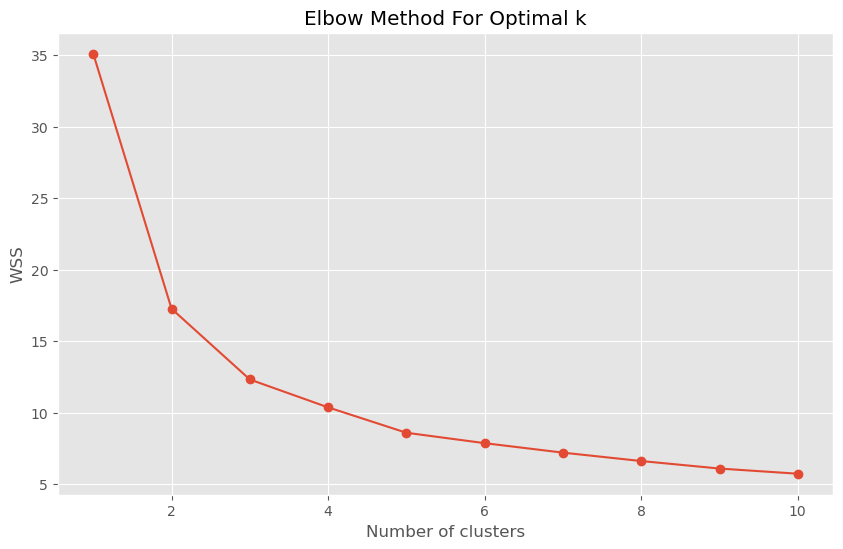

In [107]:
# Calculate WSS for different number of clusters 
wss = [] 
for k in range(1, 11): 
    kmeans = KMeans(n_clusters=k, init='k-means++',random_state=42) 
    kmeans.fit(model_df_subset_scaled) 
    wss.append(kmeans.inertia_) 

# Plot the elbow curve 
plt.figure(figsize=(10, 6)) 
plt.plot(range(1, 11), wss, marker='o') 
plt.title('Elbow Method For Optimal k') 
plt.xlabel('Number of clusters') 
plt.ylabel('WSS') 

plt.show()

The "elbow" of the curve, where the rate of decrease sharply slows down, appears to be around k=3 or k=4. 

This suggests that the optimal number of clusters for this dataset is likely 3 or 4, as adding more clusters beyond this point results in diminishing returns in terms of reducing WSS (Within-Cluster Sum of Squared Errors)

#### Modleing

In [108]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42) 
kmeans.fit(model_df_subset_scaled)

KMeans(n_clusters=4, random_state=42)

#### Adding the Clusters to the Subset of the Data

In [ ]:
# combine the data and cluster labels
cluster_labels = pd.Series(kmeans.labels_, name='customer_cluster')

# create a clean dataframe
mdoel_df_subset = pd.concat([model_df_subset, cluster_labels], axis=1)
mdoel_df_subset['customer_cluster'] = mdoel_df_subset['customer_cluster'].astype(str)
# mdoel_df_subset["household_key"] = households_demographics_spending["household_key"]
mdoel_df_subset.head()

,total_spend,total_orders,total_discount,customer_cluster,household_key
0,27859.679688,412,2509.68,2,1609
1,21661.289062,761,2880.00,2,1453
2,20352.990234,344,2491.62,2,1430
3,19299.859375,599,4131.39,2,718
4,19194.419922,498,2193.94,2,707


### Visualizing the Data with the Clusters

customer_cluster
1    371
0    225
2     47
3     25
Name: count, dtype: int64


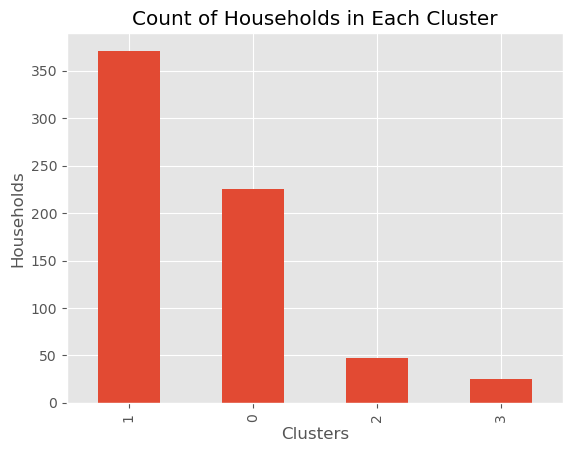

In [143]:
print(mdoel_df_subset.customer_cluster.value_counts())
mdoel_df_subset.customer_cluster.value_counts().plot.bar(title="Count of Households in Each Cluster", xlabel="Clusters", ylabel="Households");

In [172]:

# plot the 3 columns in a 3D scatter plot
fig = px.scatter_3d(mdoel_df_subset, 
                    x='total_spend', 
                    y='total_orders', 
                    z='total_discount',
                    color='customer_cluster')

# Set axis labels  and change the template
fig.update_layout( scene=dict( xaxis_title='Total Spend', yaxis_title='Total Orders', zaxis_title='Total Discount' ), 
                  legend_title_text='Customer Cluster',
                  template='plotly_dark'
)

# Show the interactive plot
fig.show()

#### Inerpreting the Segmentation

In [171]:
display(model_df_subset[seg_cols].mean(),model_df_subset_scaled.mean())

total_spend       5468.398438
total_orders       177.082335
total_discount     946.333982
dtype: float64

total_spend       0.177193
total_orders      0.129128
total_discount    0.209463
dtype: float64

In [170]:
kmeans.cluster_centers_

array([[0.23389689, 0.13842169, 0.27750774],
       [0.09283348, 0.08466664, 0.11146063],
       [0.48887347, 0.24018991, 0.57538924],
       [0.33279012, 0.49648626, 0.36347694]])

Households in **Cluster 0** on average:
* spend more than the average.
* orders more than the average
* get discount more than the average

Households in **Cluster 1** on average:
* spend less less than average
* order less than the average
* get discount less than the average

Households in **Cluster 2** on average:
* spend more than the average (above cluster 0)
* orders more than the average (above cluster 0)
* get discount more than the average (above cluster 0)

Households in **Cluster 3** on average:
* spend more than the average (above cluster 0 & below cluster 2)
* orders more than the average (above cluster 0 & cluster 2)
* get discount more than the average (above cluster 0 & below cluster 2)

### Recommendations for Business Decision Making Based on Customer Segmentation

#### **Cluster 0: High Spending, High Ordering, Moderate Discount Receivers**
- **Targeted Promotions**: Offer exclusive deals or loyalty rewards to encourage continued engagement and maintain their spending habits.
- **Upselling Opportunities**: Given their willingness to spend and order frequently, consider introducing premium products or services to increase their overall spend.

#### **Cluster 1: Low Spending, Low Ordering, Low Discount Receivers**
- **Incentivize Engagement**: Implement strategies such as discounts, limited-time offers, or bundle deals to stimulate increased orders and spending.
- **Personalized Communication**: Utilize personalized marketing to better understand their needs and provide tailored offers that could entice them to increase their spending.

#### **Cluster 2: Highest Spending, Highest Ordering, Highest Discount Receivers**
- **Retention Strategies**: Focus on retaining these valuable customers through personalized experiences, premium loyalty programs, and exclusive benefits.
- **Product Feedback Loop**: Engage these customers for feedback on products and services as they are the most invested segment, and their insights could guide product development and improvement.

#### **Cluster 3: Moderate to High Spending and Ordering, Moderate Discount Receivers**
- **Growth Potential**: Identify the potential to move these customers to Cluster 2 by offering incremental benefits or additional value propositions.
- **Cross-Selling and Bundling**: Use cross-selling and bundling strategies to increase their order size and overall spend, as they are already inclined to spend more than average.

### General Recommendations:
1. **Segmentation-Based Marketing**: Customize marketing campaigns for each cluster to address their specific needs and behaviors. This approach increases the effectiveness of marketing efforts and customer satisfaction.
2. **Resource Allocation**: Allocate resources efficiently by focusing on high-value clusters (Cluster 2 and Cluster 0) while designing strategies to uplift the lower-performing segments (Cluster 1).
3. **Discount Strategy Review**: Analyze the discounting strategies for each cluster. Consider optimizing discounts for clusters that respond well to them and re-evaluating discount effectiveness for others.
4. **Customer Journey Analysis**: Conduct a deeper analysis of customer journeys to identify touchpoints where additional value can be provided, especially for those in Clusters 1 and 3, to enhance their overall experience.

These insights can help tailor business strategies to maximize revenue, improve customer satisfaction, and ensure sustainable growth across different customer segments.


In [174]:
households_demographics_spending_final = pd.concat([households_demographics_spending, cluster_labels], axis=1)
households_demographics_spending_final.head()

,household_key,total_orders,total_spend,total_discount,avg_order_spend,avg_order_discount,spending_category,age_desc,marital_status_code,income_desc,homeowner_desc,hh_comp_desc,household_size_desc,kid_category_desc,customer_cluster
0,1609,412,27859.679688,2509.68,67.62,6.09,Very High,45-54,A,125-149K,Homeowner,2 Adults Kids,5+,3+,2
1,1453,761,21661.289062,2880.00,28.46,3.78,Very High,45-54,A,125-149K,Homeowner,2 Adults Kids,3,1,2
2,1430,344,20352.990234,2491.62,59.17,7.24,Very High,35-44,A,35-49K,Homeowner,2 Adults Kids,3,1,2
3,718,599,19299.859375,4131.39,32.22,6.90,Very High,45-54,A,25-34K,Homeowner,2 Adults Kids,5+,3+,2
4,707,498,19194.419922,2193.94,38.54,4.41,Very High,25-34,A,100-124K,Homeowner,2 Adults Kids,5+,3+,2
